<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2019


<img style="width: 700px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2019/blob/master/Images/Banner.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Word cloud </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>April 25, 2019</b></p>

<hr style="height:5px;border:none" />

# 1. What is a word cloud?
<hr style="height:1px;border:none" />

A **word cloud** (or a **tag cloud**) is a visual representation of (meta-) text data. Terms in the text data are displayed in different font sizes and colors. This enables prominent terms to stand out over other terms, based on their relative prominence. 

## Simple example: Emma

Let's take a look at the word cloud generated for Emma by Jane Austen, available on NLTK's Gutenberg corpus. We will use the **`WordCloud`** function available in the **`wordcloud`** library.

`<SimpleExample.py>`

In [1]:
%matplotlib inline

In [3]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# loading Emma by Jane Austen
from nltk.corpus import gutenberg
text = gutenberg.raw('austen-emma.txt')

Now, the entire text has been loaded. Then the word cloud is generated by the **`WordCloud`** function. Here, we set the maximum font size (**`max_font_size`**) to be 72 points.

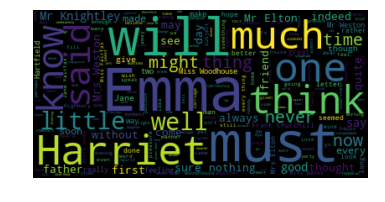

In [4]:
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=72).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The `WordCloud` function has a built-in set of stop words. Thus, stop words are automatically removed from the word cloud.


## Simple example: Syllabus

You can also generate a word cloud using based on a plain text file. Here is a word cloud generated by the syllabus of this course (converted to a text file, **`Syllabus_UTFormat_v5.txt`**).

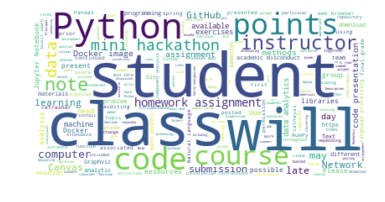

In [5]:
# loading course syllabus
f = open('Analytics_Syllabus_v2.txt','r', encoding = "ISO-8859-1")
text = f.read()
f.close()

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=72, background_color='white').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Here, I changed the background color (**`background_color`**) to white.

# 2. Word clouds on processed text data
<hr style="height:1px;border:none" />

Technically speaking, we do not need **NLTK** to generate word clouds. However, tools available on NLTK may help you refine your word cloud. As an example, we generated a word cloud from the Sherlock Holmes example we saw in the earlier class.

`<ProcessedText.py>`

In [6]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Loading The Adventures of Sherlock Holmes by Arthur Conan Doyle
# from the Project Gutenberg
from urllib import request
url = "http://www.gutenberg.org/ebooks/1661.txt.utf-8"
response = request.urlopen(url)
rawText = response.read().decode('utf8')

First, the word cloud before any text processing.

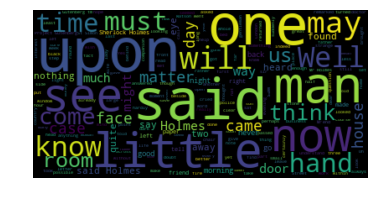

In [7]:
# word cloud before text processing
wordcloud = WordCloud(max_font_size=72).generate(rawText)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Next, we lemmatize the text, after removing stop words.

In [8]:
# tokenizing
wordText = nltk.word_tokenize(rawText)

# Lemmatizing using POS tags
stop_words = set(stopwords.words('english'))  # stop words in English
lmt = WordNetLemmatizer()
wordPOS = nltk.pos_tag(wordText)
# removing punctuation marks & stop words, making all words lower case, 
wordPOSDePunct = [(w[0].lower(), w[1]) for w in wordPOS if w[0].isalpha()]
wordPOSNoStopwd = [w for w in wordPOSDePunct if w[0] not in stop_words]
# initializing the lammatized word list
wordPOSLemma = []
for wPair in wordPOSNoStopwd:
    if wPair[1][0] == 'J':   # i.e., adjectives
        wordPOSLemma.append(lmt.lemmatize(wPair[0],pos='a'))
    elif wPair[1][0] == 'V':  # i.e., verbs
        wordPOSLemma.append(lmt.lemmatize(wPair[0],pos='v'))
    elif 'RB' in wPair[1]:  # i.e., adverbs
        wordPOSLemma.append(lmt.lemmatize(wPair[0],pos='r'))
    else:
        wordPOSLemma.append(lmt.lemmatize(wPair[0]))

Then we concatenate processed words into a single text with the **`join`** method associated with string data.

In [9]:
# concatenating all words into a long text
procText = ' '.join(wordPOSLemma)

Now the word cloud on the lemmatized text.

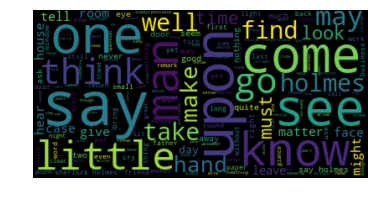

In [10]:
# word cloud after text processing
wordcloud = WordCloud(max_font_size=72).generate(procText)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Once the text data is POS-tagged, you can generate a subset of the text data with a particular category of words only (e.g., nouns, verbs, etc.). Here is a word cloud with nouns only.

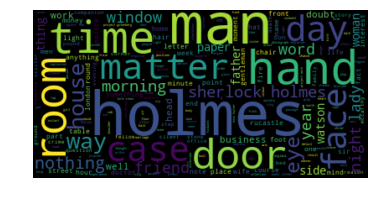

In [11]:
# just nouns only
wordNouns = []
for wPair in wordPOSNoStopwd:
    if 'NN' in wPair[1]:  # i.e., nouns
        wordNouns.append(lmt.lemmatize(wPair[0]))

# concatenating all words into a long text
nounText = ' '.join(wordNouns)

# word cloud after text processing
wordcloud = WordCloud(max_font_size=72).generate(nounText)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Or verbs only.

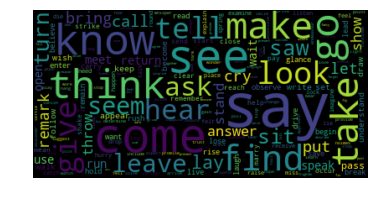

In [12]:
# just verbs only
wordVerbs = []
for wPair in wordPOSNoStopwd:
    if 'VB' in wPair[1]:  # i.e., verbs
        wordVerbs.append(lmt.lemmatize(wPair[0],pos='v'))

# concatenating all words into a long text
verbText = ' '.join(wordVerbs)

# word cloud after text processing
wordcloud = WordCloud(max_font_size=72).generate(verbText)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Or adjectives only.

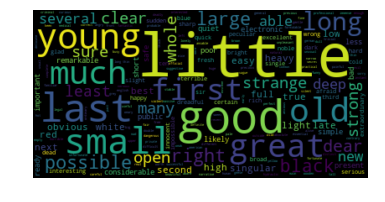

In [13]:
# just adjectives only
wordAdjs = []
for wPair in wordPOSNoStopwd:
    if 'JJ' in wPair[1]:  # i.e., adjectives
        wordAdjs.append(lmt.lemmatize(wPair[0],pos='a'))

# concatenating all words into a long text
adjText = ' '.join(wordAdjs)

# word cloud after text processing
wordcloud = WordCloud(max_font_size=72).generate(adjText)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()